In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
dfpets = pd.read_csv("DATOS/df_pets.csv", index_col= "Unnamed: 0")
dfpets.sample(2)

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
25,Nebraska,710.00,51.3,364.00,33.8,240.0,1.6,374.0,31.3,222.0,2.3,514.00
18,Maryland,2.17,52.3,1.13,30.8,667.0,1.4,915.0,29.8,645.0,2.6,1.68


In [4]:
# media, mediana, moda, máximo y mínimo

mediadog = round(dfpets["Dog Owning Households (1000s)"].mean(), 2)
print(f"la media de hogares con perros es de {mediadog}")
medianadog = round(dfpets["Dog Owning Households (1000s)"].median(), 2)
print(f"la mediana de hogares con perros es de {medianadog}")
maxdog = round(dfpets["Dog Owning Households (1000s)"].max(), 2)
print(f"el número máximo de hogares con perros es de {maxdog}")
mindog = round(dfpets["Dog Owning Households (1000s)"].min(), 2)
print(f"el número mínimo de hogares con perros es de {mindog}")

la media de hogares con perros es de 308.04
la mediana de hogares con perros es de 190.0
el número máximo de hogares con perros es de 989.0
el número mínimo de hogares con perros es de 1.01


In [5]:
# Percentiles 25, 75

percentil25 = np.percentile(dfpets["Dog Owning Households (1000s)"], 25)
print (f"el percentil 25 es {percentil25}")

percentil75 = np.percentile(dfpets["Dog Owning Households (1000s)"], 75)
print (f"el percentil 75 es {percentil75}")

el percentil 25 es 2.72
el percentil 75 es 584.0


In [6]:
# Rango Intercualtílico

rangointerdog = percentil75 - percentil25
rangointerdog

581.28

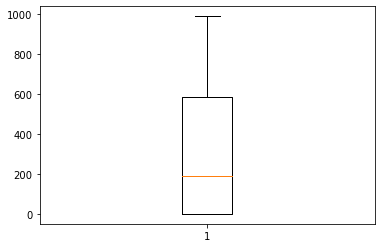

In [7]:
# Boxplot de Dog Owning Households (1000s):

plt.boxplot(x= dfpets["Dog Owning Households (1000s)"]);

In [8]:
# Tabla de frecuencias cualitativa:

def añadir_categoria(col):
    if col <= 250.00:
        return "baja"
    elif col > 250.01 and col <= 500.00:
        return "media"
    else:
        return "alta"

In [9]:
dfpets["dog_owning_category"] = dfpets["Dog Owning Households (1000s)"].apply(añadir_categoria)

In [10]:
dfpets.to_csv("DATOS/df_pets.csv")

In [11]:
dfpets.sample(2)

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population,dog_owning_category
37,Rhode Island,434.00,53.0,230.00,29.3,127.00,1.3,161.00,27.6,120.00,1.8,212.00,baja
8,Florida,7.61,54.4,4.14,35.7,2.72,1.5,4.21,27.3,2.08,2.1,4.38,baja


In [12]:
# vamos a filtrar sólo por por location para que no aparezcan todas las columnas con el mismo número de count

dfpets_dog = dfpets.groupby("dog_owning_category")["Location"].count().reset_index()
dfpets_dog

,dog_owning_category,Location
0,alta,15
1,baja,27
2,media,7


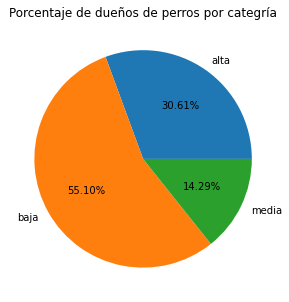

In [13]:
# Frecuencia relativa:

plt.figure(figsize = (10,5))
plt.pie(dfpets_dog["Location"], labels= dfpets_dog["dog_owning_category"], autopct='%.2f%%', radius = 1)
plt.title("Porcentaje de dueños de perros por categría");

In [14]:
# Tabla de frecuencias cuantitativa:

dfpets_house = dfpets.groupby("Number of Pet Households (in 1000)")["Location"].count().reset_index().sort_values(by = "Location", ascending = False)
dfpets_house.head()

,Number of Pet Households (in 1000),Location
0,1.09,2
10,1.61,2
12,2.09,2
43,937.00,1
34,476.00,1
